In [1]:
import pandas as pd

In [2]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

In [3]:
from matplotlib import pyplot

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
df = [ 420.735,392.943, 440.593, 450.037, 430.345, 471.033, 423.456, 458.989, 470.767, 420.368, 432.456, 487.409, 458.989, 467.765, 432.341, 399.563, 412.324, 398.452, 419.452, 470.567]

In [7]:
index= pd.date_range(start='2000', end='2020', freq='A')

In [8]:
data = pd.Series(df, index)

In [9]:
data=pd.DataFrame(data)

In [10]:
data

,0
2000-12-31,420.735
2001-12-31,392.943
2002-12-31,440.593
2003-12-31,450.037
2004-12-31,430.345
2005-12-31,471.033
2006-12-31,423.456
2007-12-31,458.989
2008-12-31,470.767
2009-12-31,420.368


In [11]:
train=data.iloc[int(len(data)*0.7)]
train=data.iloc[0:int(len(data)*0.7),0]
test=data.iloc[int(len(data)*0.7):,0]
test

2014-12-31    432.341
2015-12-31    399.563
2016-12-31    412.324
2017-12-31    398.452
2018-12-31    419.452
2019-12-31    470.567
Freq: A-DEC, Name: 0, dtype: float64

In [12]:
train

2000-12-31    420.735
2001-12-31    392.943
2002-12-31    440.593
2003-12-31    450.037
2004-12-31    430.345
2005-12-31    471.033
2006-12-31    423.456
2007-12-31    458.989
2008-12-31    470.767
2009-12-31    420.368
2010-12-31    432.456
2011-12-31    487.409
2012-12-31    458.989
2013-12-31    467.765
Freq: A-DEC, Name: 0, dtype: float64

In [13]:
train2=pd.DataFrame(train)
train2

,0
2000-12-31,420.735
2001-12-31,392.943
2002-12-31,440.593
2003-12-31,450.037
2004-12-31,430.345
2005-12-31,471.033
2006-12-31,423.456
2007-12-31,458.989
2008-12-31,470.767
2009-12-31,420.368


In [14]:
model = SimpleExpSmoothing(train).fit(smoothing_level=0.1,optimized=False)
model1 = SimpleExpSmoothing(train).fit(optimized=True)
forecast = model.forecast(len(test))

In [15]:
forecast

2014-12-31    443.626704
2015-12-31    443.626704
2016-12-31    443.626704
2017-12-31    443.626704
2018-12-31    443.626704
2019-12-31    443.626704
Freq: A-DEC, dtype: float64

In [16]:
model.summary()

Dep. Variable:,0,No. Observations:,14
Model:,SimpleExpSmoothing,SSE,11232.715
Optimized:,False,AIC,97.625
Trend:,None,BIC,98.904
Seasonal:,None,AICC,102.070
Seasonal Periods:,None,Date:,"Fri, 27 Jan 2023"
Box-Cox:,False,Time:,19:28:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
initial_level,420.73500,l.0,False


<AxesSubplot:>

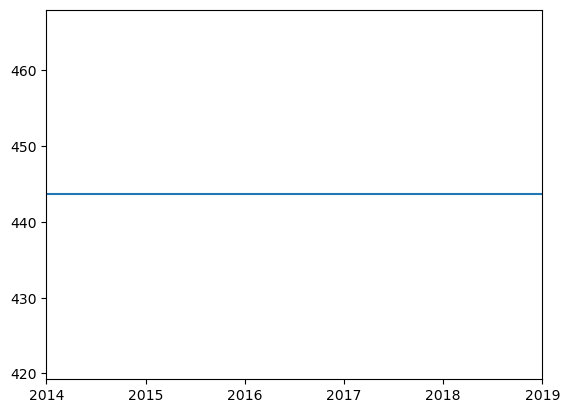

In [17]:
forecast.plot()

negative means all rows wxcept except the last column:

In [18]:
a=model.fittedvalues

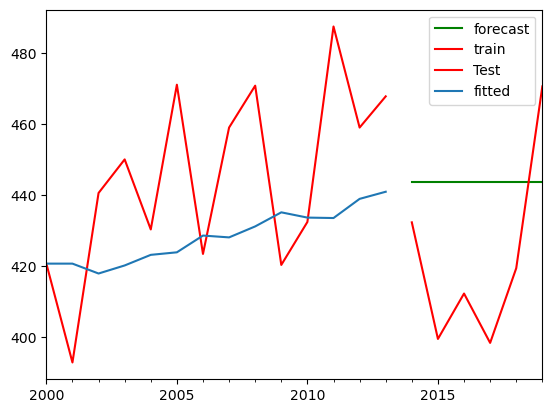

In [19]:

forecast.plot(label='forecast',color='green')
train.plot(label='train',color='red')
test.plot(label='Test', color='red')

a.plot(label='fitted')
plt.legend(loc='best')

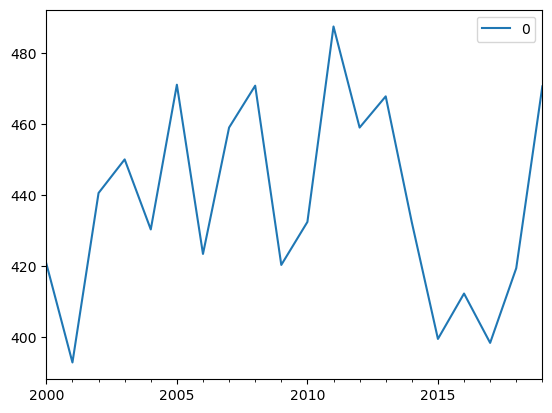

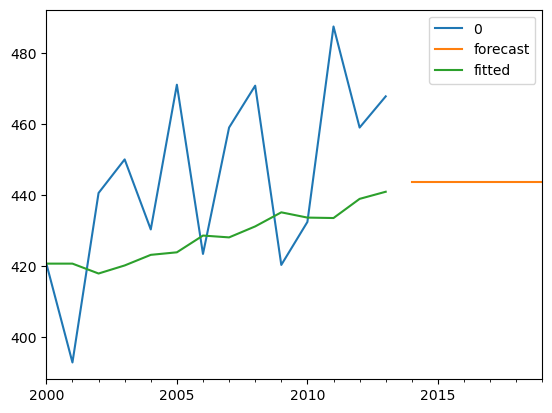

In [20]:
data.plot(label='actual')
train2.plot()
forecast.plot(label='forecast')
a.plot(label='fitted')
plt.legend(loc='best')

In [21]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [22]:
MAPE(forecast,test)

6.872963793242361

In [23]:
fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(smoothing_level=0.2, optimized=False)

In [24]:
fit1.forecast(5)

2020-12-31    434.47229
2021-12-31    434.47229
2022-12-31    434.47229
2023-12-31    434.47229
2024-12-31    434.47229
Freq: A-DEC, dtype: float64

In [25]:
fit1 = Holt(data, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")

In [26]:
fcast1

2020-12-31    465.355422
2021-12-31    472.024637
2022-12-31    478.693852
2023-12-31    485.363067
2024-12-31    492.032282
Freq: A-DEC, Name: Holt's linear trend, dtype: float64

In [27]:
fit1 = Holt(data, initialization_method="known",initial_trend=5, initial_level=2).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")

In [28]:
fit1.summary()

Dep. Variable:,0,No. Observations:,20
Model:,Holt,SSE,208496.318
Optimized:,False,AIC,193.039
Trend:,Additive,BIC,197.022
Seasonal:,None,AICC,199.500
Seasonal Periods:,None,Date:,"Fri, 27 Jan 2023"
Box-Cox:,False,Time:,19:28:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [29]:
fcast1

2020-12-31    466.712217
2021-12-31    474.392693
2022-12-31    482.073168
2023-12-31    489.753644
2024-12-31    497.434119
Freq: A-DEC, Name: Holt's linear trend, dtype: float64

In [30]:
fit1.summary()

Dep. Variable:,0,No. Observations:,20
Model:,Holt,SSE,208496.318
Optimized:,False,AIC,193.039
Trend:,Additive,BIC,197.022
Seasonal:,None,AICC,199.500
Seasonal Periods:,None,Date:,"Fri, 27 Jan 2023"
Box-Cox:,False,Time:,19:28:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False
